In [1]:
import numpy as np
import pandas as pd
#绘图
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#各种模型、数据处理方法

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import precision_score
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
import warnings
warnings.filterwarnings('ignore')

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
g_Parch = train_df.groupby(['Parch'])['Survived']
g_Parch.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [8]:
g_SibSp = train_df.groupby(['SibSp'])['Survived']
g_SibSp.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [9]:
train_df.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F2             3
E101           3
F33            3
C22 C26        3
D              3
C2             2
B51 B53 B55    2
C125           2
C83            2
C124           2
D35            2
C52            2
C123           2
C126           2
C92            2
B18            2
E67            2
E121           2
C68            2
D33            2
B49            2
E25            2
E44            2
B28            2
C78            2
C93            2
B5             2
              ..
B37            1
D49            1
B41            1
D7             1
C7             1
F G63          1
D56            1
B94            1
C49            1
A36            1
D48            1
A26            1
A24            1
B82 B84        1
C128           1
C82            1
E10            1
B80            1
C30            1
B19            1
C86            1
D50            1
D15            1
E49            1
A14            1
F E69          1
C111           1
E46           

Text(0,0.5,'人数')

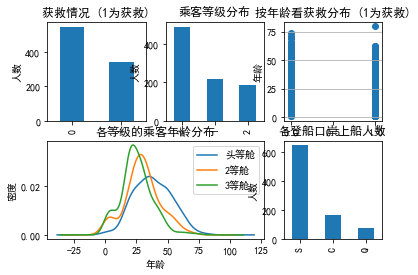

In [10]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

plt.subplot2grid((2,3),(0,0))             # 在一张大图里分列几个小图，位置是(0，0)
train_df.Survived.value_counts().plot(kind='bar')# plots a bar graph of those who surived vs those who did not.
plt.title(u"获救情况 (1为获救)") # puts a title on our graph
plt.ylabel(u"人数")

plt.subplot2grid((2,3),(0,1))             # 在一张大图(2 * 3)中的位置是(0，1)
train_df.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"人数")
plt.title(u"乘客等级分布")

plt.subplot2grid((2,3),(0,2))
plt.scatter(train_df.Survived, train_df.Age)
plt.ylabel(u"年龄")                         # sets the y axis lable
plt.grid(b=True, which='major', axis='y') # formats the grid line style of our graphs
plt.title(u"按年龄看获救分布 (1为获救)")


plt.subplot2grid((2,3),(1,0), colspan=2)   # colspan = 2 表示横向跨度是 2
train_df.Age[train_df.Pclass == 1].plot(kind='kde')   # plots a kernel desnsity estimate of the subset of the 1st class passanges's age
train_df.Age[train_df.Pclass == 2].plot(kind='kde')
train_df.Age[train_df.Pclass == 3].plot(kind='kde')
plt.xlabel(u"年龄")# plots an axis lable
plt.ylabel(u"密度")
plt.title(u"各等级的乘客年龄分布")
plt.legend((u'头等舱', u'2等舱',u'3等舱'),loc='best') # sets our legend for our graph.


plt.subplot2grid((2,3),(1,2))
train_df.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸上船人数")
plt.ylabel(u"人数")


Text(0,0.5,'人数')

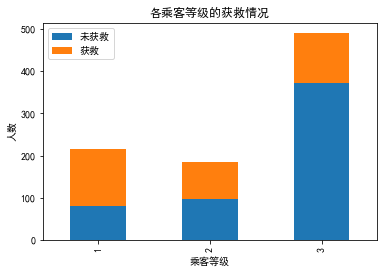

In [11]:
#各乘客等级的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = train_df.Pclass[train_df.Survived == 0].value_counts()
Survived_1 = train_df.Pclass[train_df.Survived == 1].value_counts()
dfPclass=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
dfPclass.plot(kind='bar', stacked=True)  #  stacked=True 合并为一列，否则为两列
plt.title(u"各乘客等级的获救情况")
plt.xlabel(u"乘客等级")
plt.ylabel(u"人数")

Text(0,0.5,'人数')

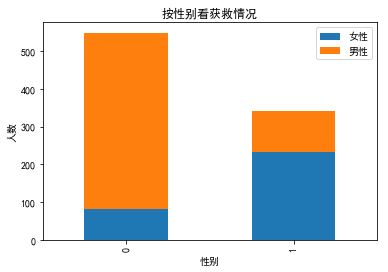

In [12]:
#各性别的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_m = train_df.Survived[train_df.Sex == 'male'].value_counts()
Survived_f = train_df.Survived[train_df.Sex == 'female'].value_counts()
dfSex=pd.DataFrame({u'男性':Survived_m, u'女性':Survived_f})
dfSex.plot(kind='bar', stacked=True)
plt.title(u"按性别看获救情况")
plt.xlabel(u"性别")
plt.ylabel(u"人数")

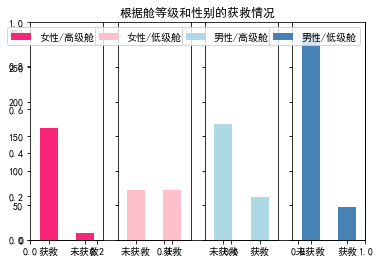

In [13]:
 #各种舱级别情况下各性别的获救情况
fig=plt.figure()
fig.set(alpha=0.65) # 设置图像透明度，无所谓
plt.title(u"根据舱等级和性别的获救情况")

ax1=fig.add_subplot(141)
train_df.Survived[train_df.Sex == 'female'][train_df.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels([u"获救", u"未获救"], rotation=0)
ax1.legend([u"女性/高级舱"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
train_df.Survived[train_df.Sex == 'female'][train_df.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"女性/低级舱"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
train_df.Survived[train_df.Sex == 'male'][train_df.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/高级舱"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
train_df.Survived[train_df.Sex == 'male'][train_df.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/低级舱"], loc='best')



In [14]:
g_C = train_df.groupby(train_df.Cabin.isnull())['Survived']
g_C.value_counts()

Cabin  Survived
False  1           136
       0            68
True   0           481
       1           206
Name: Survived, dtype: int64

Text(0,0.5,'人数')

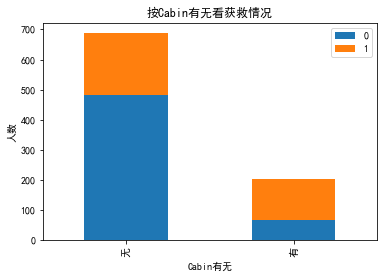

In [15]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_cabin = train_df.Survived[pd.notnull(train_df.Cabin)].value_counts()
Survived_nocabin = train_df.Survived[pd.isnull(train_df.Cabin)].value_counts()
df=pd.DataFrame({u'有':Survived_cabin, u'无':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"按Cabin有无看获救情况")
plt.xlabel(u"Cabin有无") 
plt.ylabel(u"人数")


In [16]:
g_E = train_df.groupby('Embarked')['Survived']
g_E.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

Text(0,0.5,'人数')

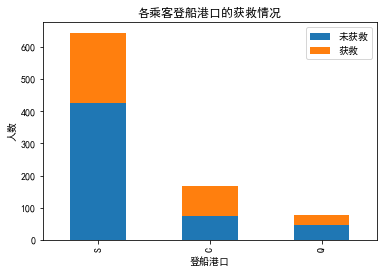

In [17]:
#各乘客等级的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = train_df.Embarked[train_df.Survived == 0].value_counts()
Survived_1 = train_df.Embarked[train_df.Survived == 1].value_counts()
dfEmbarked=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
dfEmbarked.plot(kind='bar', stacked=True)  #  stacked=True 合并为一列，否则为两列
plt.title(u"各乘客登船港口的获救情况")
plt.xlabel(u"登船港口")
plt.ylabel(u"人数")

In [18]:
# 合并一起处理比较方便
combine_df = pd.concat([train_df,test_df])
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [19]:
group = combine_df.groupby([ 'Pclass'])['Age']
combine_df['Age'] = group.transform(lambda x: x.fillna(x.median()))

In [20]:
combine_df.Embarked = combine_df.Embarked.fillna('S')
df = pd.get_dummies(combine_df['Embarked'],prefix='Embarked')
combine_df = pd.concat([combine_df,df],axis=1).drop('Embarked',axis=1)

In [21]:
combine_df['Cabin_isNull'] = np.where(combine_df['Cabin'].isnull(),0,1)
combine_df = combine_df.drop('Cabin',axis=1)

In [22]:
if combine_df['Fare'].isnull().sum() != 0:
        combine_df['Fare'] = combine_df[['Fare']].fillna(combine_df.groupby('Pclass').transform('mean'))

In [23]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
Age             1309 non-null float64
Fare            1309 non-null float64
Name            1309 non-null object
Parch           1309 non-null int64
PassengerId     1309 non-null int64
Pclass          1309 non-null int64
Sex             1309 non-null object
SibSp           1309 non-null int64
Survived        891 non-null float64
Ticket          1309 non-null object
Embarked_C      1309 non-null uint8
Embarked_Q      1309 non-null uint8
Embarked_S      1309 non-null uint8
Cabin_isNull    1309 non-null int32
dtypes: float64(3), int32(1), int64(4), object(3), uint8(3)
memory usage: 121.4+ KB


In [24]:
df = pd.get_dummies(combine_df['Sex'],prefix='Sex')
combine_df = pd.concat([combine_df,df],axis=1).drop('Sex',axis=1)

In [25]:
df = pd.get_dummies(combine_df['Pclass'],prefix='Pclass')
combine_df = pd.concat([combine_df,df],axis=1).drop('Pclass',axis=1)

In [26]:
# 数据预处理工作scaling，将一些变化幅度较大的特征化到[-1,1]之内
# 这样可以加速logistic regression的收敛
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(combine_df[['Age']])
combine_df['Age_scaled'] = scaler.fit_transform(combine_df[['Age']], age_scale_param)
fare_scale_param = scaler.fit(combine_df[['Fare']])
combine_df['Fare_scaled'] = scaler.fit_transform(combine_df[['Fare']], fare_scale_param)


In [27]:
combine_df = combine_df.drop(['Fare','Age','Name','Ticket'],axis=1)

In [28]:
combine_df.head(5)

,Parch,PassengerId,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Cabin_isNull,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,0,1,1,0.0,0,0,1,0,0,1,0,0,1,-0.547380,-0.503271
1,0,2,1,1.0,1,0,0,1,1,0,1,0,0,0.667747,0.734756
2,0,3,0,1.0,0,0,1,0,1,0,0,0,1,-0.243598,-0.490220
3,0,4,1,1.0,0,0,1,1,1,0,1,0,0,0.439911,0.383198
4,0,5,0,0.0,0,0,1,0,0,1,0,0,1,0.439911,-0.487804


In [29]:
X_train = combine_df.iloc[:891,:].drop(["PassengerId","Survived"], axis=1)
Y_train = combine_df.iloc[:891,:]["Survived"]
X_test = combine_df.iloc[891:,:].drop(["PassengerId","Survived"], axis=1)

In [30]:
clf = LogisticRegression(C=1.0, penalty='l2', tol=1e-6)
clf.fit(X_train , Y_train)
print(round(clf.score(X_train, Y_train) * 100, 2))

81.71


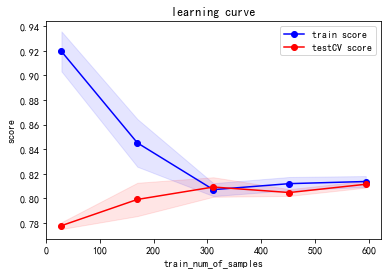

In [31]:
def plot_learning_curve(clf, title, X, y, ylim=None, cv=None, n_jobs=3, train_sizes=np.linspace(.05, 1., 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        clf, X, y, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    ax = plt.figure().add_subplot(111)
    ax.set_title(title)
    if ylim is not None:
        ax.ylim(*ylim)
    ax.set_xlabel(u"train_num_of_samples")
    ax.set_ylabel(u"score")

    ax.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                     alpha=0.1, color="b")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                     alpha=0.1, color="r")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"train score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"testCV score")

    ax.legend(loc="best")

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(clf, u"learning curve",X_train, Y_train)
plt.show()

In [33]:
Y_pred = clf.predict(X_test)
result = pd.DataFrame({'PassengerId':test_df['PassengerId'].as_matrix(), 'Survived':Y_pred.astype(np.int32)})
result.to_csv("logistic_regression_predictions.csv", index=False)